## Векторые модели: дизайн, веса, снижение размерности пространства, сравнение векторов

**Основная идея**: мы можем представить слова и фразы в виде векторов. Векторы приобретают значение за счёт того, что они вложены (are embedded) в матрицу репрезентаций, имеющих схожую с ними структуру

**Зачем получать векторые репрезентации?**

1) Чтобы лучше понимать использование слов в контексте: лингвистам интересно и полезно изучать, что можно узнать об устройстве лексики и об использовании слов в контексте с помощью подходов, основанных на анализе большого количества данных

2) Чтобы использовать векторные репрезентации в других моделях

**Большая объяснительная сила, много опций дизайна:**

A. Препроцессинг: токенизация, лемматизация, парсинг...
Кластеризация по автору/дискурсивному контексту/теме...

B. Тип матрицы: слово × документ, слово × слово, прилагательное × модифицируемое существительное, слово × синтаксическое отношение, глагол × аргументы...

C. Взвешивание: вероятности/нормализация/TF-IDF/PMI (Pointwise Mutual Information)/Positive PMI...

D. Снижение размерности пространства: LSA (Latent Semantic Analysis), PCA...

E. Сравнение векторов: косинусное расстояние, Эвклидово расстояние, мера Жаккара (Jaccard)...

**Дизайн матрицы**

Есть много способов задать матрицу. Схематическое изложение основных шагов построения матрицы слово × слово:

1. Определите релевантное понимание контекста встречаемости (co-occurrence context). Контекстом может быть целый документ, параграф, предложение, клауза, именная группа -- любой фрагмент, который позволяет Вам определить те отношения, которые Вам нужны

2. Определите метод подсчета. Самое простое: посчитать всё, что внутри контекстного окна, приписав одинаковые веса. А можно поиграть с весами, например, приписывать веса, основываясь на близости к целевому слову, $1/l$, где $l$ -- расстояние токена до целевого токена

3. Проходим по корпусу, создавая словарь $d$, который сопоставляет пары слов значениям совместной встречаемости (определённым согласно пункту 2) в контексте (определённом согласно пункту 1)

4. Определяем полный словарь $V$ на основе словаря из пункта 3. Малочастотные пары можно удалить

5. Теперь создаём матрицу M размерности $|V|×|V|$, где в строках и в столбцах слова. Каждая ячейка $M[i,j]$ содержит значение $d[(w_i,w_j)]$

### Уменьшение размерности

Эта часть хендаута взята [тут](https://github.com/klyshinsky/ML_masters_2020/blob/master/Lecture_20201026_Reduce_space.ipynb).

Рассмотрим один из методов уменьшения размерности, <a href="https://habr.com/post/304214/">метод главных компонент</a> (<i>PCA, Principle Component Analysis, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"> документация</a></i>, поиграть можно <a href="https://setosa.io/ev/principal-component-analysis/">здесь</a>, с большим количеством математики метод описывается на <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82">machinelearning.ru</a>). Его суть состоит в том, что мы преобразуем пространство в новое, имеющее меньшую размерность, и строим проекцию на него. Для этого находится новая ось, вдоль которой относительная дисперсия наших данных максимальна. Далее строится проекция всех точек на эту ось, а полученные значения становятся первой координатой в новом пространстве. Это направление отбрасывается, после чего можно снова попытаться найти еще одну ось, еще одну и т.д. Операцию можно повторить столько раз, сколько измерений должно быть в новом пространстве.

По умолчанию, PCA строит представление пространства той же размерности, что и входные данные, однако сортирует измерения по "важности".<br>
При помощи функции fit_transform мы настраиваем коэффициенты преобразования (fit) и преобразуем переданные точки (transform). Каждое из этих действий для PCA можно производить по отдельности.<br>

Посмотрим, как метод себя ведет на некоторых простых данных. Есть линия со случайными смещениями, к которой прибавлена относительно плоская область, идущая вдоль той же линии ("палочка" + "половинка монетки"). Посмотрим на ее преобразования при помощи метода главных компонент.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

In [2]:
np.random.seed(17)
pca_len=100

In [3]:
pca_coord=np.zeros((pca_len, 3))
pca_coord2=np.zeros((int(pca_len/2), 3))

pca_coord[:,0]=np.arange(pca_len)
pca_coord[:,1]=3*pca_coord[:,0]+np.random.normal(scale=3., size=(pca_len))
pca_coord[:,2]=5*pca_coord[:,0]+np.random.normal(scale=5., size=(pca_len))

pca_coord2[:,0]=np.arange(pca_len/4, 3*pca_len/4)
pca_coord2[:,1]=[3*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 5, 1) for x in pca_coord2[:,0]]
pca_coord2[:,2]=[5*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 1, 1) for x in pca_coord2[:,0]]

pca_coord=np.vstack((pca_coord, pca_coord2))

Для начала нарисуем данные при помощи seaborn.

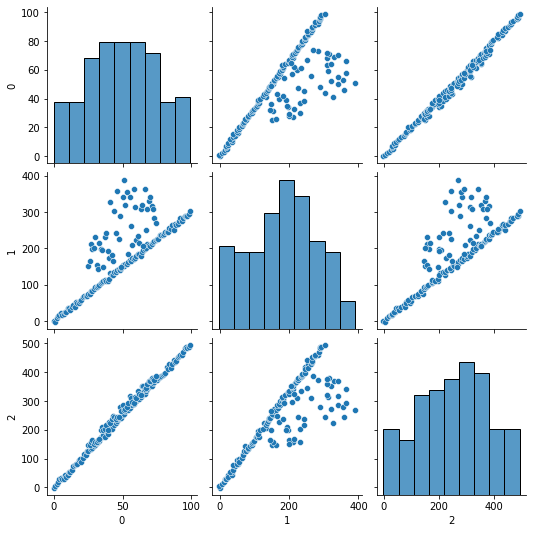

In [6]:
sns.pairplot(pd.DataFrame(pca_coord));

In [9]:
pca=PCA(n_components=2) # Просим PCA вернуть 2 координаты. По умолчанию, вернет столько же, сколько подадим на вход
show_reduced = pca.fit_transform(pca_coord)
pca_coord.shape, show_reduced.shape

((150, 3), (150, 2))

Плюсом метода PCA является тот факт, что после нахождения осей, в новое пространство можно преобразовать любую точку исходного пространства. Это возможно, так как преобразование сводится к повороту, масштабированию и проекции.

In [10]:
# Координаты осей в исходном пространстве
pca.components_

array([[-0.15786887, -0.57311394, -0.8041255 ],
       [-0.13885943,  0.81913003, -0.55654654]])

In [14]:
def plot_PCA(pca_coord):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=60, azim=150) # Рисуем трехмерную картинку
    ax.scatter(pca_coord[:, 0], pca_coord[:, 1], pca_coord[:, 2], 
               cmap=plt.cm.Set1, edgecolor='g', s=40)
    ax.set_title("Простой пример")

    plt.show()

    pca=PCA(n_components=2) # Просим PCA вернуть 2 коодинаты. По умолчанию, вернет столько же, сколько подадим на вход
    show_reduced = pca.fit_transform(pca_coord)

    fig, ax = plt.subplots() # Рисуем двумерную картинку
    ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
               cmap=plt.cm.autumn, edgecolor='b', s=40)
    plt.show()
    

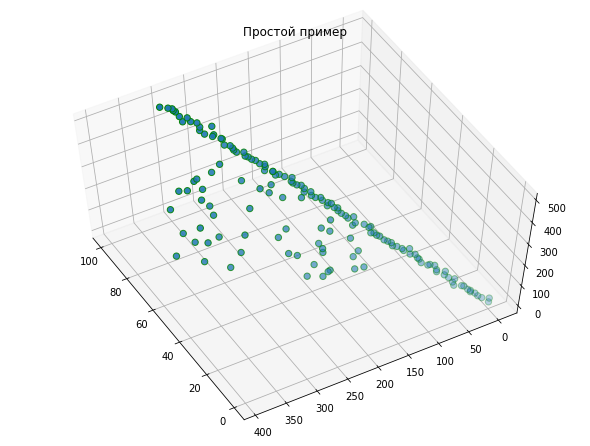

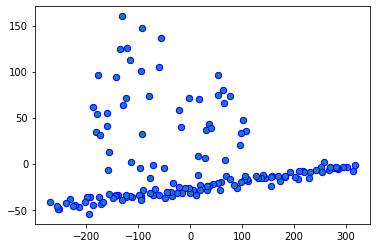

In [15]:
plot_PCA(pca_coord)

### Сравнение векторов: измерение расстояния между ними

**Косинусное расстояние**

$\textbf{cosine}(u, v) = 
1 - \frac{\sum_{i=1}^{n} u_{i} \cdot v_{i}}{\|u\|_{2} \cdot \|v\|_{2}}$


In [19]:
from scipy.spatial.distance import cosine, euclidean

In [17]:
a = np.random.random(100)
b = np.random.random(100)
cosine(a, b)

0.30557187187892254

**Эвклидово расстояние**

$\textbf{euclidean}(u, v) = 
\sqrt{\sum_{i=1}^{n}|u_{i} - v_{i}|^{2}}$

In [20]:
a = np.random.random(100)
b = np.random.random(100)
euclidean(a, b)

4.1576404683286325

Больше опций [тут](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)